In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import neighbors
from sklearn import svm
from sklearn.metrics import mean_absolute_error, confusion_matrix
import re
import numpy as np
import seaborn as sns # for data visualization



# Load the data set
df = pd.read_csv("titanic.csv")
df.describe()
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
7       1         0                           Andrews, Mr. Thomas Jr    male   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9       1         0                          Artagaveytia, Mr. Ramon    male   

     age  sibsp  parch    ticket      fare    cabin embarked boat   body  \
0  29.00      0      0     24160  211.3375       B5        S    2    NaN   
1   0.92      1      2    113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2    113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2    113781  151.5500  C22 C26        S  NaN    NaN   
5  48.00      0      0     19952   26.5500      E12        S    3    NaN   
6  63.00      1      0     13502   77.9583       D7        S   10    NaN   
7  39.00      0      0    112050    0.0000      A36        S  NaN    NaN   
8  53.00      2      0     11769   51.4792     C101        S    D    NaN   
9  71.00      0      0  PC 17609   49.5042      NaN        C  NaN   22.0   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON  
5                     New York, NY  
6                       Hudson, NY  
7                      Belfast, NI  
8              Bayside, Queens, NY  
9              Montevideo, Uruguay

In [81]:
# Functions

## create age groups
def convertToAgeGroup(age):
    a = ''
    if age <= 12:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'young_adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a


def convertToFareGroup(fare):
    
    a= ''
    if fare <= 4:
        a = 'lowest'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "highest"
    return a

def convertTitle(feature):
    result = ''
    if feature in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col', 'Rev', 'Dona', 'Dr']:
        result = 'rare'
    elif feature in ['Ms', 'Mlle']:
        result = 'Miss'
    elif feature == 'Mme':
        result = 'Mrs'
    else:
        result = feature
    return result

In [82]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.survived, df.age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.age[df.pclass == 1].plot(kind='kde')    
df.age[df.pclass == 2].plot(kind='kde')
df.age[df.pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Passengers per boarding location')

Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

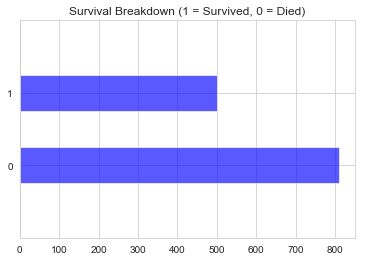

In [83]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

(-1, 2)

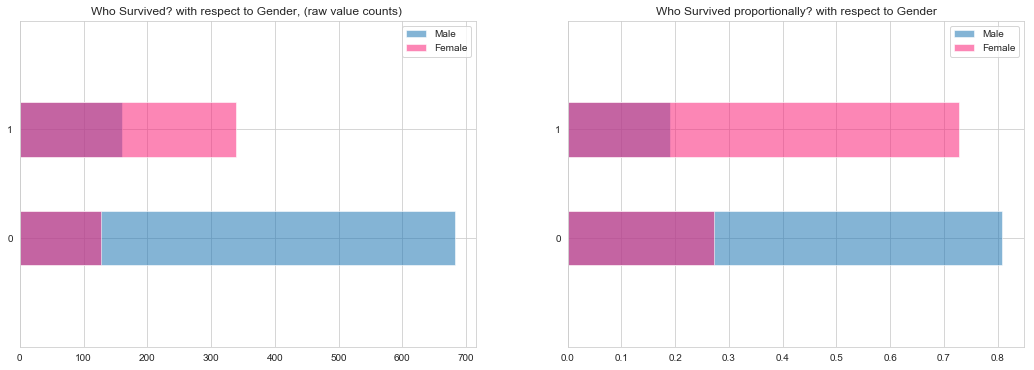

In [84]:
fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.survived[df.sex == 'male'].value_counts().sort_index()
df_female = df.survived[df.sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

In [85]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.survived[df.sex == 'female'][df.pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.survived[df.sex == 'female'][df.pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.survived[df.sex == 'male'][df.pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.survived[df.sex == 'male'][df.pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [86]:
fig = plt.figure(figsize=(18,12), dpi=1600)
a = 0.65
# Step 1
ax1 = fig.add_subplot(341)
df.survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(df.survived.value_counts()))
plt.title("Step. 1")

# Step 2
ax2 = fig.add_subplot(345)
df.survived[df.sex == 'male'].value_counts().plot(kind='bar',label='Male')
df.survived[df.sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survived? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(df.survived[df.sex == 'male'].value_counts()/float(df.sex[df.sex == 'male'].size)).plot(kind='bar',label='Male')
(df.survived[df.sex == 'female'].value_counts()/float(df.sex[df.sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3
ax4 = fig.add_subplot(349)
female_highclass = df.survived[df.sex == 'female'][df.pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = df.survived[df.sex == 'female'][df.pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = df.survived[df.sex == 'male'][df.pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = df.survived[df.sex == 'male'][df.pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

In [121]:
## Missing data
total = df.isnull().sum().sort_values(ascending=False) # total number of values - else will count only NA values
percentageNull = ((df.isnull().sum()/ df.isnull().count()) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percentageNull], axis=1, keys=['Total', 'MissingValues %'])
print(missing_data.head(10))

# Columns
print('Total number of columns are %d'%df.columns.values.size)
print(df.columns.values)

# Removing unnecessary columns
titanic_df = df
titanic_df["title"] = [i.split('.')[0] for i in titanic_df.name] # There is a dot after every title
titanic_df["title"] = [i.split(',')[1] for i in titanic_df.title]
titanic_df.title = titanic_df.title.apply(lambda x: x.strip())
titanic_df["title"] = [i.replace('Ms', 'Miss') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Mlle', 'Miss') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Mme', 'Mrs') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Dr', 'rare') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Col', 'rare') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Major', 'rare') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Don', 'rare') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Jonkheer', 'rare') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Sir', 'rare') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Lady', 'rare') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Capt', 'rare') for i in titanic_df.title]
titanic_df["title"] = [i.replace('the Countess', 'rare') for i in titanic_df.title]
titanic_df["title"] = [i.replace('Rev', 'rare') for i in titanic_df.title]
titanic_df.title = titanic_df.title.map(convertTitle)
titanic_df = pd.get_dummies(titanic_df,columns=['title'], drop_first=True)
titanic_df = titanic_df.drop(['name'], axis=1) # Name is unnecessary

#print(titanic_df.head(10))

# Extracting the Deck out of the Cabin
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
titanic_df['cabin'] = titanic_df['cabin'].fillna('U0')
titanic_df['deck'] = titanic_df['cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
titanic_df['deck'] = titanic_df['deck'].map(deck)
titanic_df['deck'] = titanic_df['deck'].fillna(0)
titanic_df['deck'] = titanic_df['deck'].astype(int)
titanic_df = titanic_df.drop(['cabin'], axis=1)
#print(titanic_df.head(10))


# Replacing age with the mean
meanAge = titanic_df['age'].mean()
print('the mean age is %d'%meanAge)
ageCopy = titanic_df['age'].copy().replace(np.nan, meanAge, regex=True).apply(np.ceil).astype(int)
titanic_df['age'] = ageCopy

# Survived
titanic_df['survived'] = titanic_df['survived'].astype(int)

# Fare
titanic_df['fare'] = titanic_df['fare'].fillna(0).astype(int)


# categorical data
#print(titanic_df.info()) # sex, ticket, cabin, embarked, boat
#print(titanic_df.head(10))

#sex
genders = {'male':'M', 'female':'F'}
print(titanic_df['sex'].describe())
titanic_df['sex'] = titanic_df['sex'].map(genders)


# ticket - cannot convert to categories , too many unique tickets
titanic_df = titanic_df.drop(['ticket'], axis=1)


# Embarked
print(titanic_df['embarked'].describe())
titanic_df['embarked'] = titanic_df['embarked'].fillna('S') # Must fill dummies


#Boat
boat_null = titanic_df[pd.isna(titanic_df['boat'])]
print(boat_null['survived'].sum()) # Only 23 who did not get on a boat survived
titanic_df[['boat']] = np.where(titanic_df[['boat']].isnull(), 0, 1)

# Body - Too many missing values for body
titanic_df = titanic_df.drop(['body'], axis=1)

# One hot encoding of sex
titanic_df = pd.get_dummies(titanic_df, columns = ['sex'])


# creating age groups
titanic_df['age_group'] = titanic_df['age'].map(convertToAgeGroup)
titanic_df = pd.get_dummies(titanic_df,columns=['age_group'], drop_first=True)


## Creating family size variable
titanic_df['family_size'] = titanic_df.sibsp + titanic_df.parch+1

# Creating isAlone feature depending on the family size
titanic_df['is_alone'] = [1 if i<=1 else 0 for i in titanic_df.family_size]

## Calculated Fare
titanic_df['calculated_fare'] = titanic_df.fare/titanic_df.family_size
titanic_df['fare_group'] = titanic_df['calculated_fare'].map(convertToFareGroup)


## Drop dest
titanic_df = titanic_df.drop(['home.dest'], axis=1) # destination too many missing values

## Convert embarked to dummies
titanic_df = pd.get_dummies(titanic_df,columns=['embarked', 'fare_group'], drop_first=True)


           Total  MissingValues %
body        1188        90.756303
cabin       1014        77.463713
boat         823        62.872422
home.dest    564        43.086325
age          263        20.091673
embarked       2         0.152788
fare           1         0.076394
title          0         0.000000
ticket         0         0.000000
parch          0         0.000000
Total number of columns are 15
['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked' 'boat' 'body' 'home.dest' 'title']
the mean age is 29
count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object
count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object
23


In [122]:
# Correlation Matrix

pd.DataFrame(abs(titanic_df.corr()['survived']).sort_values(ascending = False))

survived
survived                  1.000000
boat                      0.948190
title_Mr                  0.529016
sex_M                     0.528693
sex_F                     0.528693
title_Mrs                 0.352682
pclass                    0.312469
title_Miss                0.306269
deck                      0.278284
fare                      0.244619
calculated_fare           0.211536
fare_group_low            0.209336
is_alone                  0.201719
fare_group_highest        0.155783
embarked_S                0.150542
age_group_child           0.110200
parch                     0.082660
age_group_young_adult     0.081382
fare_group_lowest         0.054456
age                       0.051083
age_group_middle_aged     0.038183
title_rarea               0.035171
age_group_old             0.032861
sibsp                     0.027825
family_size               0.026876
fare_group_mid            0.022464
age_group_teenager        0.018939
embarked_Q                0.016071
age_group_senior_citizen  0.014219
title_rare                0.007555

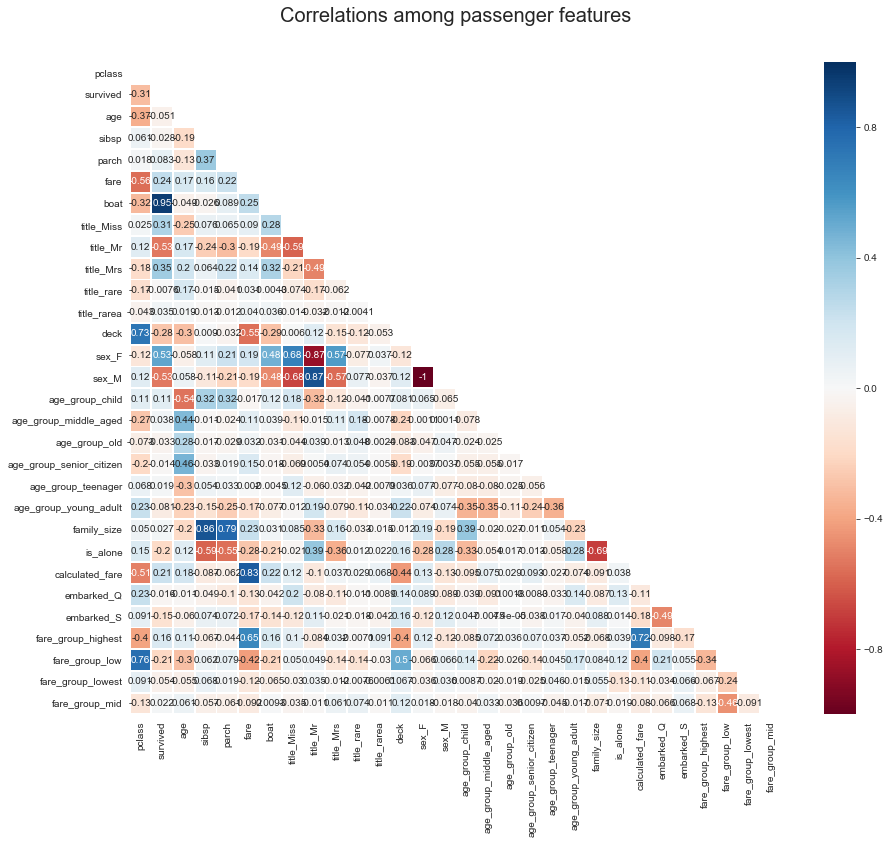

In [123]:
# Viewing Correlations
mask = np.zeros_like(titanic_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(titanic_df.corr(), annot=True, mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9,  linecolor='white', fmt='.2g',center = 0, square=True)
plt.title("Correlations among passenger features", y = 1.03,fontsize = 20, pad = 40);


In [124]:
titanic_df.head(5)

pclass  survived  age  sibsp  parch  fare  boat  title_Miss  title_Mr  \
0       1         1   29      0      0   211     1           1         0   
1       1         1    1      1      2   151     1           0         0   
2       1         0    2      1      2   151     0           1         0   
3       1         0   30      1      2   151     0           0         1   
4       1         0   25      1      2   151     0           0         0   

   title_Mrs  ...  age_group_young_adult  family_size  is_alone  \
0          0  ...                      1            1         1   
1          0  ...                      0            4         0   
2          0  ...                      0            4         0   
3          0  ...                      1            4         0   
4          1  ...                      1            4         0   

   calculated_fare  embarked_Q  embarked_S  fare_group_highest  \
0           211.00           0           1                   1   
1            37.75           0           1                   0   
2            37.75           0           1                   0   
3            37.75           0           1                   0   
4            37.75           0           1                   0   

   fare_group_low  fare_group_lowest  fare_group_mid  
0               0                  0               0  
1               0                  0               0  
2               0                  0               0  
3               0                  0               0  
4               0                  0               0  

[5 rows x 30 columns]

In [ ]:
## Y = survived
## x = Features 
## No age - replace by average